## Задание по анализу данных и визуализации

Этапы работы:
- Выбрать данные, которые вам интересны, предпочтительно в табличной форме (Excel, CSV)
- С помощью Pandas провести какой-то анализ данных и визуализацию
- По возможности стилизовать визуализацию, чтобы получить некоторую консистентную инфографику в оригинальном стиле

### Выбор данных

Рекомендумые ресурсы для поиска данных:
* [Список от Yandex](https://yandex.ru/project/oda/useful)
* [Kaggle](http://Kaggle.com) – сайт соревований для датасайнтистов. Там же можно искать код
* Открытые данные:
  - ищите в интернете по этим ключевым словам
  - https://data.world/datasets/open-data
* Различные текстовые данные, из которых можно извлечь что-то интересное:
  - Видео на YouTube, у которых есть субтитры, или которые можно преобразовать в текст (см. пример)
  - Библиотеки книг: [lib.ru](http://lib.ru), [Project Gutenberg](https://www.gutenberg.org/) и др.
* Статьи:
  - [15 of the Best Free Open Data Sources for 2024](https://careerfoundry.com/en/blog/data-analytics/open-data-sources/)

### Анализ данных

Для анализа данных используем Pandas. Если вы не знаете, как сделать какую-то операцию:
* Ищем в интернет (как правило, хорошие ответы находятся на сайте stackoverflow.com)
* Спрашиваем [у ChatGPT](https://soshnikov.com/ai/how-to-use-chatgpt-ru/)

In [1]:
import pandas as pd

# df = pd.read_csv(...) # чтение файла CSV, иногда может потребоваться указать разделитель sep=';'
# df = pd.read_excel('titanic.xlsx') # чтение файла Excel

In [13]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

# Загрузка стоп-слов (если нужно исключить их из анализа)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Загрузка датасета (предположим, что он в формате CSV)
df = pd.read_csv('discog_data.csv')  # Замените на имя вашего файла

# Функция для очистки текста и подсчёта слов
def clean_and_count_words(text):
    # Удаляем знаки препинания и приводим текст к нижнему регистру
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Разделяем текст на слова
    words = text.split()
    # Удаляем стоп-слова
    words = [word for word in words if word not in stop_words]
    return words

# Применяем функцию ко всем текстам песен
all_words = []
for lyrics in df['lyrics']:  # Используем столбец 'lyrics'
    all_words.extend(clean_and_count_words(lyrics))

# Подсчитываем частотность слов
word_freq = Counter(all_words)

# Преобразуем результат в DataFrame для удобства
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Сортируем по частоте
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Выводим топ-20 самых частых слов
print(word_freq_df.head(20))

# Сохраняем результат в CSV (опционально)
word_freq_df.to_csv('kendrick_word_frequency.csv', index=False)

      Word  Frequency
20      im        733
53    like        489
13    dont        379
25    know        375
4    nigga        302
654   fuck        294
26     got        277
24     get        269
199   love        252
150   aint        221
242  bitch        214
216   shit        203
525    one        193
85      go        188
117   life        185
6    thats        183
184    see        173
80    tell        172
179   want        170
128   back        170


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


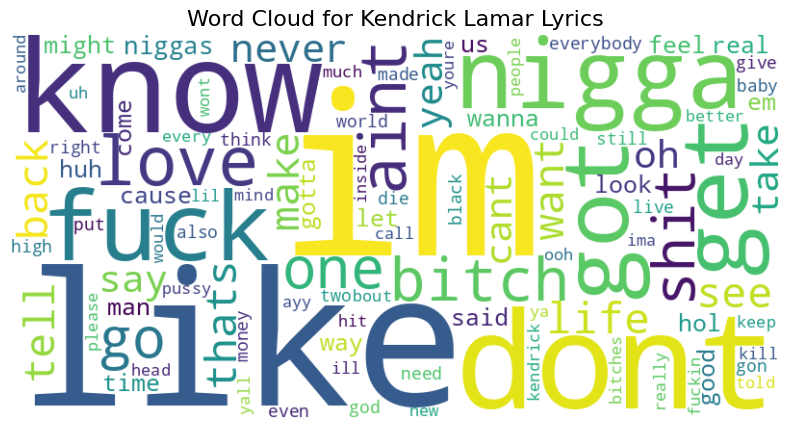

In [15]:
import pandas as pd
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Загружаем стоп-слова
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Загрузка датасета (предположим, что он в формате CSV)
df = pd.read_csv('discog_data.csv')  # Замените на имя вашего файла

# Функция для очистки текста и подсчёта слов
def clean_and_count_words(text):
    # Удаляем знаки препинания и приводим текст к нижнему регистру
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Разделяем текст на слова
    words = text.split()
    # Удаляем стоп-слова
    words = [word for word in words if word not in stop_words]
    return words

# Применяем функцию ко всем текстам песен
all_words = []
for lyrics in df['lyrics']:  # Используем столбец 'lyrics'
    all_words.extend(clean_and_count_words(lyrics))

# Подсчитываем частотность слов
word_freq = Counter(all_words)

# Преобразуем результат в DataFrame для удобства
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Создаем словарь для облака слов
word_freq_dict = dict(word_freq_df.values)

# Создаем облако слов
wordcloud = WordCloud(
    width=800,              # Ширина изображения
    height=400,             # Высота изображения
    background_color='white',  # Цвет фона
    colormap='viridis',     # Цветовая схема
    max_words=100           # Максимальное количество слов
).generate_from_frequencies(word_freq_dict)

# Визуализируем облако слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Отключаем оси
plt.title('Word Cloud for Kendrick Lamar Lyrics', fontsize=16)
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

colors = ['#558474', '#ED1C24', '#B8B8B9']

data = pd.read_csv('discog_data.csv')
all_lyrics = ' '.join(data['Lyrics'].values)
unwanted_words = ['ca', 'na']
text_to_exclude = set(stopwords.words('english') + list(string.punctuation) + unwanted_words)
tokens = word_tokenize(all_lyrics.lower())
filtered_tokens = [word for word in tokens if word.isalnum() and not word in text_to_exclude]
word_freq = pd.Series(filtered_tokens).value_counts()

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (12, 6))
    word_freq.head(15).plot(kind = 'bar', color = colors)
    plt.title('Частотность слов в песнях Кендрика Ламара', fontname = 'Roboto Mono', fontweight = 'Medium',
                                                                            color = '#050505')
    plt.xlabel('Слово', fontname = 'Roboto Mono')
    plt.ylabel('Частота', fontname = 'Roboto Mono')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'discog_data.csv'